In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Import Libarires :

In [136]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

# Load Data 

In [137]:
path = '/kaggle/input/titanic-dataset/Titanic-Dataset.csv'
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA :

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


show the statistical information for numeric featuers :

In [139]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


show the statistical information for catigorical  featuers :

In [140]:
df.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


show the precentae of null values in each featuer :

In [141]:
(df.isna().sum()/df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

we will need to remove capin featuer because it include 77.1 % missng values 

remove > Cabin featuer 

In [142]:
df.drop('Cabin' , axis = 1 , inplace = True)

In [143]:
print(f"Len of Fare = {len(df[df['Fare']== 0.0])}")
df[df['Fare']== 0.0]

Len of Fare = 15


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S


Inconsistent Fare Values

In the dataset, there are 15 records where the Fare value is equal to zero.
This is considered inconsistent because passengers were generally required to pay for their tickets.

While in some historical cases, such values could represent crew members, family, or friends who traveled free of charge or at a discount, the presence of duplicate ticket numbers in the dataset suggests that these entries are more likely data inconsistencies rather than genuine cases of free travel.

Since there is no clear documentation or reliable reference confirming that these specific records correspond to crew or companions, it is reasonable to treat them as invalid and remove them to maintain data quality.


[ ]


Remove observation when have 0.0 Fare :

In [144]:
df = df[df['Fare'] != 0.0]

check babys (less than 2 years)

In [145]:
df[ df['Age'] < 2 ] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S


In [146]:
len(df[ df['Age'] < 2 ] )

14

In the dataset, there are 14 infants and babies under the age of 2 years. Their ages range from 0.42 years (approximately 5 months old) to 2 years, representing the youngest passengers on board.

📊 Categorical Data Summary
🔍 Data Overview:
The Titanic dataset contains 891 entries. Below is the summary of key categorical columns:

Name: 891 unique values (each passenger has a distinct name). Example: Braund, Mr. Owen Harris.
Sex: 2 unique categories — male (577) and female (314).
Ticket: 681 unique tickets, with some tickets shared among family members or groups. Most frequent ticket: 347082 (appears 7 times).
Cabin: Only 204 entries are recorded, with 687 missing. 147 unique cabins; the most frequent is B96 B98 (4 times).
Embarked: 3 unique categories — S, C, and Q. Most passengers embarked from S (Southampton) with 644 records.
🚩 Missing Values:
The Cabin column has a very high proportion of missing data (687 missing). The Embarked column has 2 missing values. Other categorical columns (Name, Sex, and Ticket) are complete with no missing values.

✅ Key Observations:
- The Name field uniquely identifies passengers. - Shared Ticket numbers indicate families or groups traveling together. - The Cabin data is sparse and may not be reliable for analysis. - Embarked values show most passengers boarded at Southampton.

In [147]:
for col in df.select_dtypes('O'):
    print(col , df[col].nunique())

Name 876
Sex 2
Ticket 671
Embarked 3


Value counts for the 'Sex' column:
Sex
male      562
female    314
Name: count, dtype: int64
------------------------------


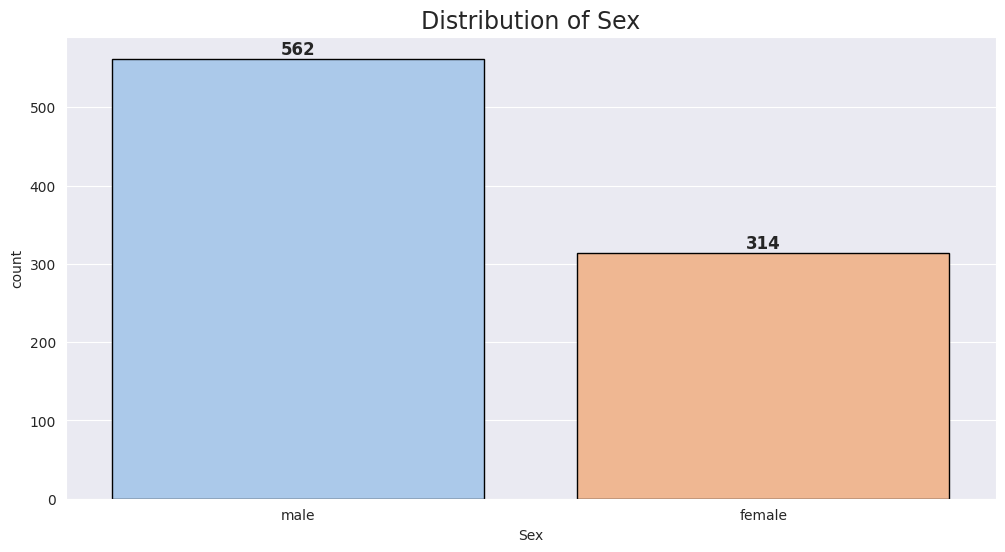

Value counts for the 'Embarked' column:
Embarked
S    629
C    168
Q     77
Name: count, dtype: int64
------------------------------


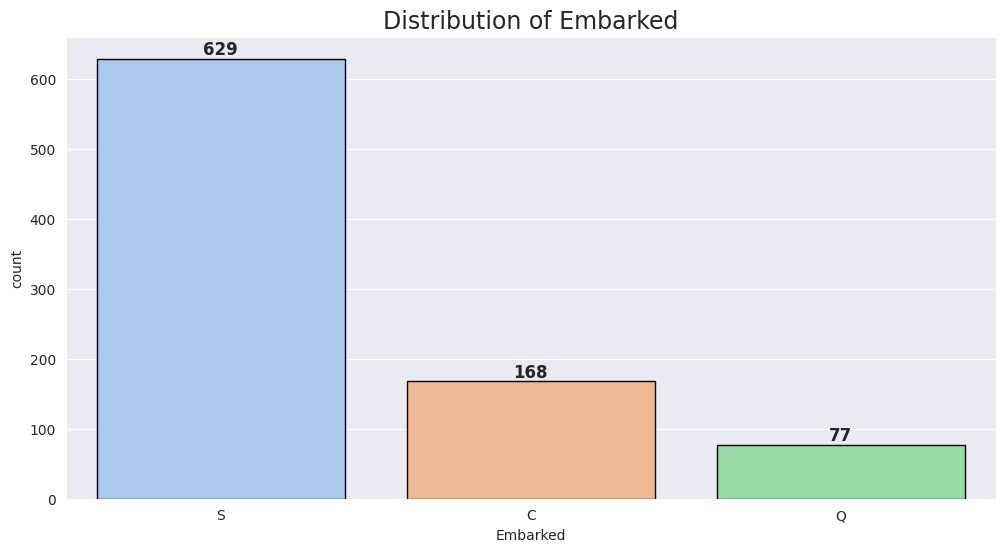

In [148]:
for col in df.select_dtypes(include='O').columns:
    if col not in ["Name", "Ticket", "Cabin"]:
        print(f"Value counts for the '{col}' column:")
        print(df[col].value_counts())
        print("-" * 30) 

        plt.figure(figsize=(12, 6))
        plt.title(f'Distribution of {col}', fontsize=17)

     
        ax = sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')

        for container in ax.containers:
            ax.bar_label(container, fontsize=12, fontweight='bold')

        plt.show()

🛳️ Embarkation & Gender
🔍 Overview:
The Titanic dataset provides information on both embarkation ports and passenger gender:

Embarked: - S (Southampton): 644 passengers - C (Cherbourg): 168 passengers - Q (Queenstown): 77 passengers
Gender: - Male: 577 passengers - Female: 314 passengers
✅ Key Insights:
- The majority of passengers — 644 out of 891 (≈72.3%) — embarked from Southampton (S), making it the primary departure port.
- Cherbourg (C) contributed 168 passengers (≈18.9%), while Queenstown (Q) had the fewest with 77 passengers (≈8.6%).
- In terms of gender, males made up 577 passengers (≈64.7%), compared to females with 314 passengers (≈35.3%).
- This shows a clear imbalance, with both Southampton as the dominant embarkation point and male passengers making up nearly two-thirds of the dataset.

Sex Sex
male      562
female    314
Name: count, dtype: int64
<BarContainer object of 3 artists>


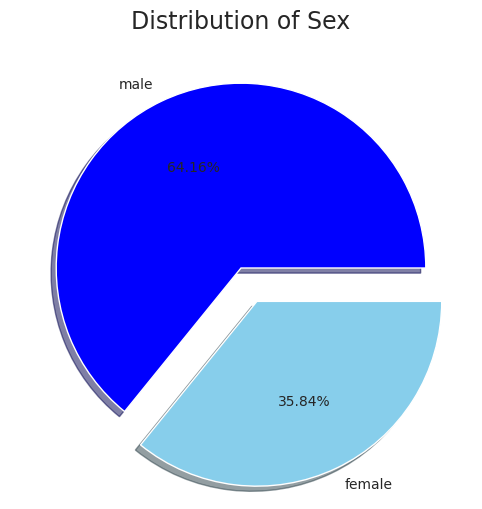

Embarked Embarked
S    629
C    168
Q     77
Name: count, dtype: int64
<BarContainer object of 3 artists>


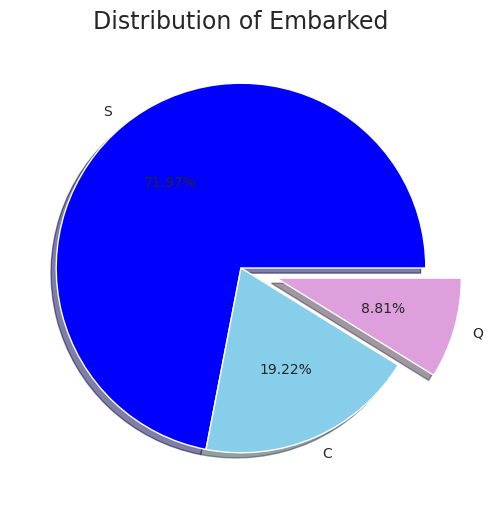

In [149]:
for i in df.select_dtypes(include='O').columns:
    if i not in ["Name","Ticket",'Cabin']:
        
        print(i,df[i].value_counts())

        min_val=np.argmin(df[i].value_counts().values)
        explode=[0]*len(df[i].value_counts().values)
        explode[min_val]=0.2
        plt.figure(figsize=(12,6))
        plt.title(f'Distribution of {i}',fontsize=17)
        plt.pie(df[i].value_counts().values,labels=df[i].value_counts().index,autopct='%.2f%%',
                colors=['blue','skyblue','plum'],
                explode=explode,
                shadow=True)
        
        for i in ax.containers:
            ax.bar_label(i,fontsize=12,fontweight='bold')
            print(i)
            
        plt.show()

Value counts for the 'Survived' column:
Survived
0    535
1    341
Name: count, dtype: int64
------------------------------


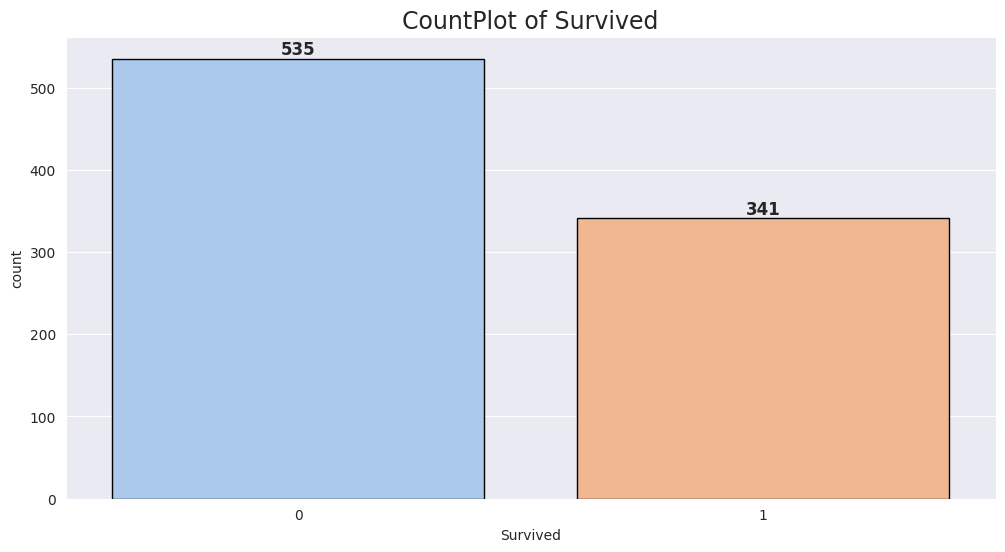

Value counts for the 'Pclass' column:
Pclass
3    487
1    211
2    178
Name: count, dtype: int64
------------------------------


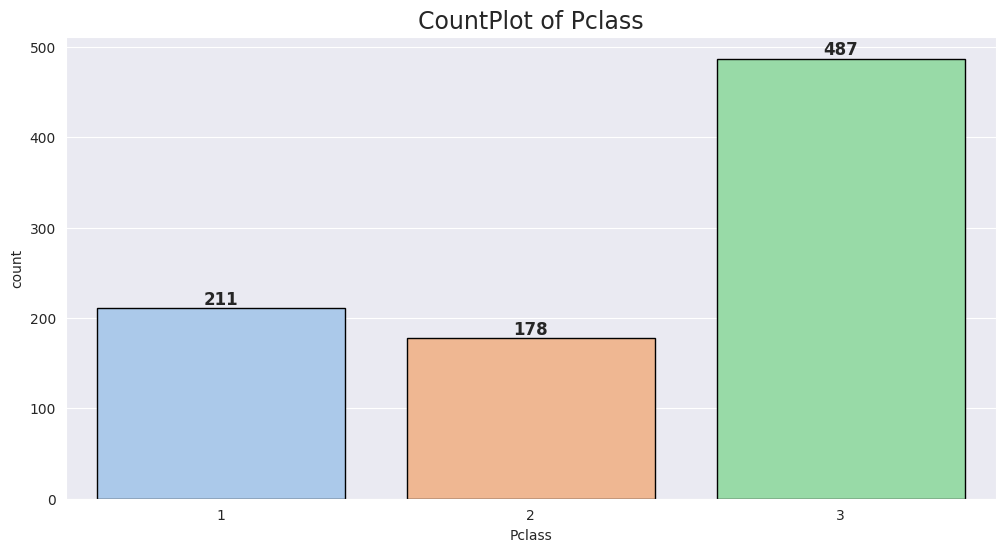

Value counts for the 'SibSp' column:
SibSp
0    593
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
------------------------------


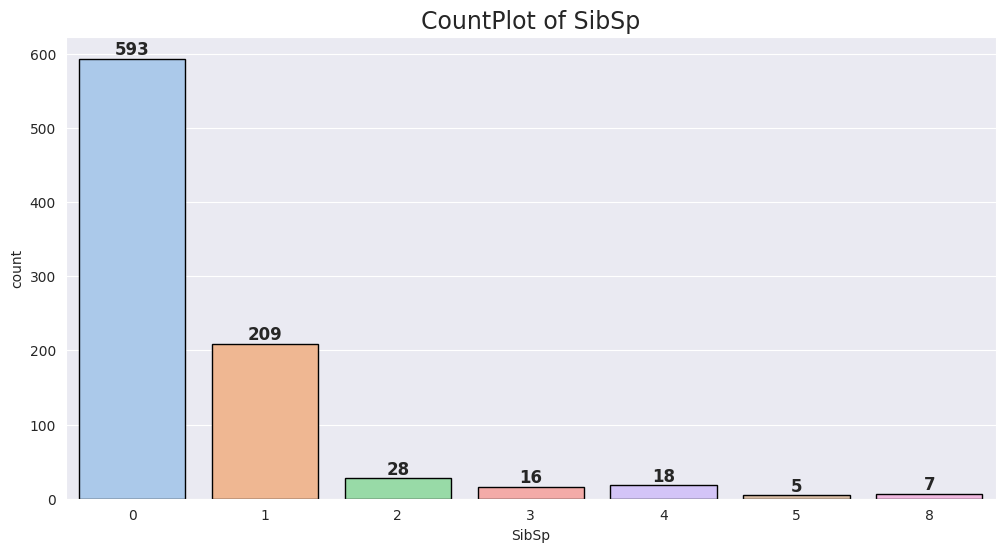

Value counts for the 'Parch' column:
Parch
0    663
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
------------------------------


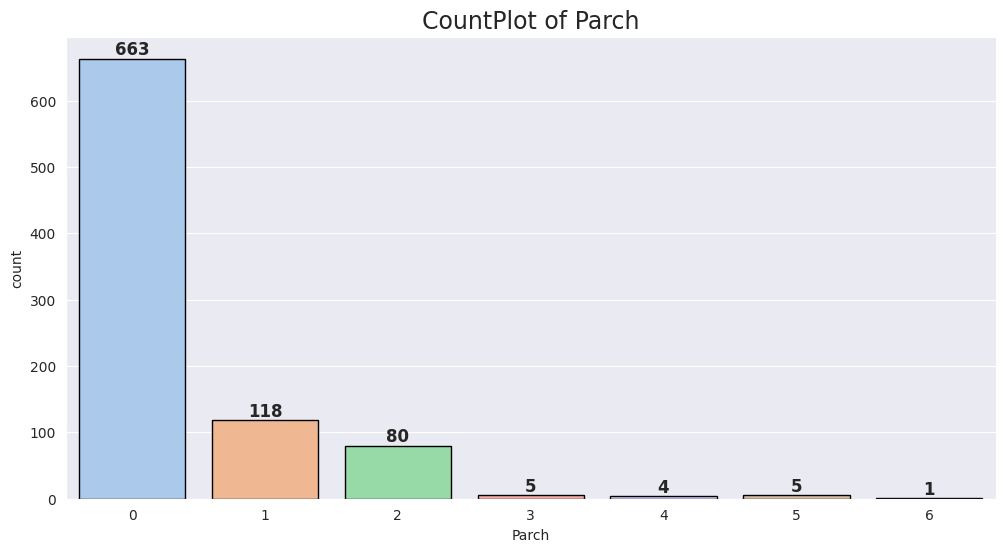

In [150]:
for col in df.select_dtypes(include='int').columns:
    if col not in ['PassengerId']:
        print(f"Value counts for the '{col}' column:")
        print(df[col].value_counts())
        print("-" * 30) 

        plt.figure(figsize=(12, 6))
        plt.title(f'CountPlot of {col}', fontsize=17)

     
        ax = sns.countplot(data=df, x=col, palette='pastel', edgecolor='black')

        for container in ax.containers:
            ax.bar_label(container, fontsize=12, fontweight='bold')

        plt.show()

Age 88


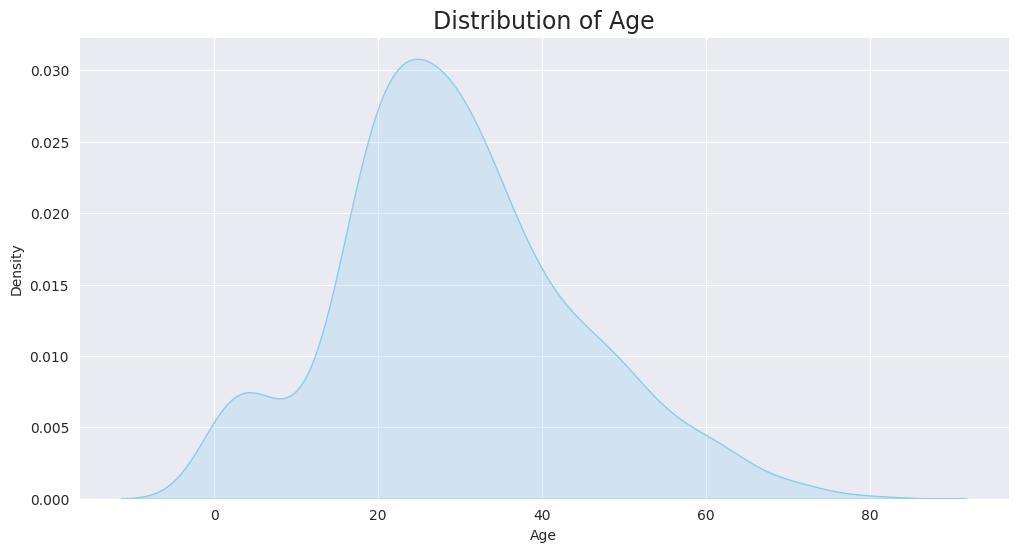

SibSp 7


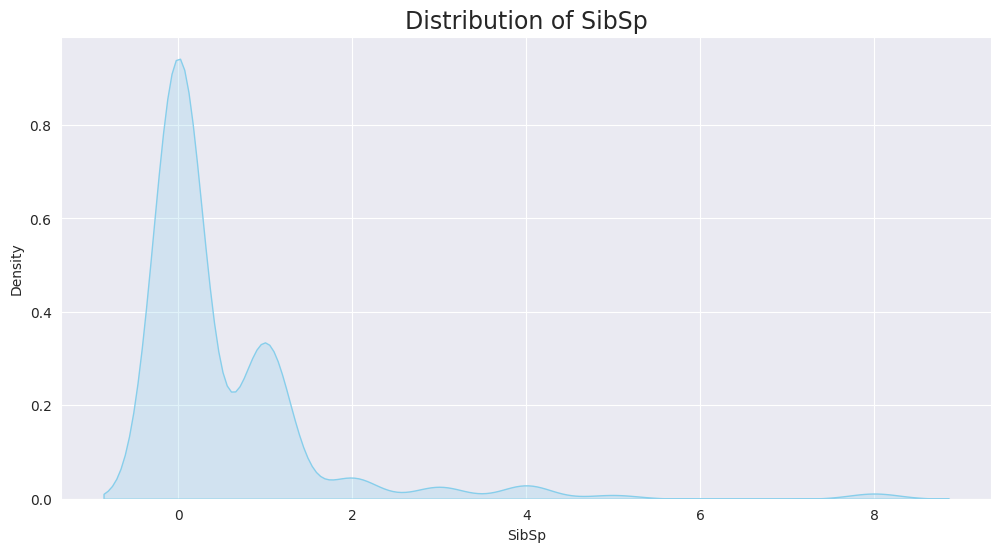

Parch 7


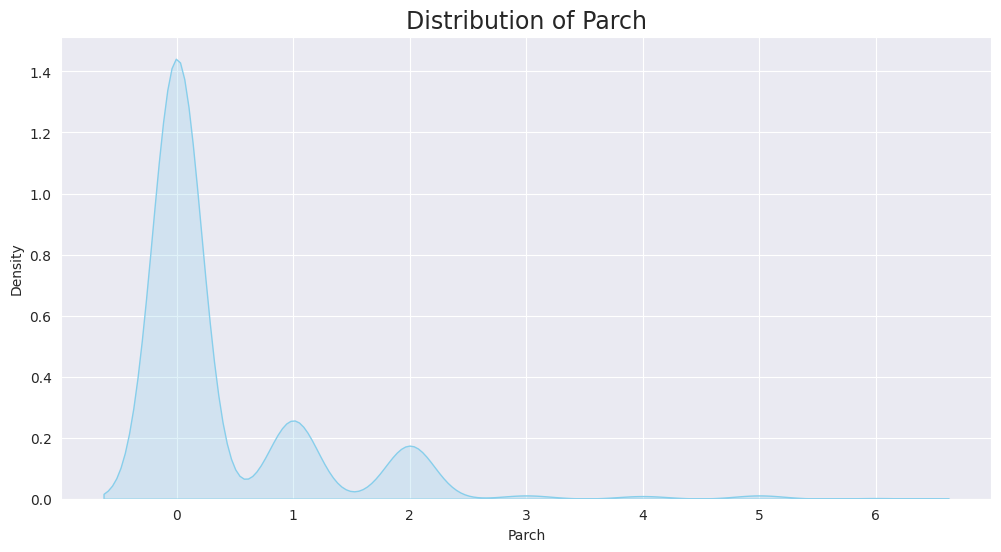

Fare 247


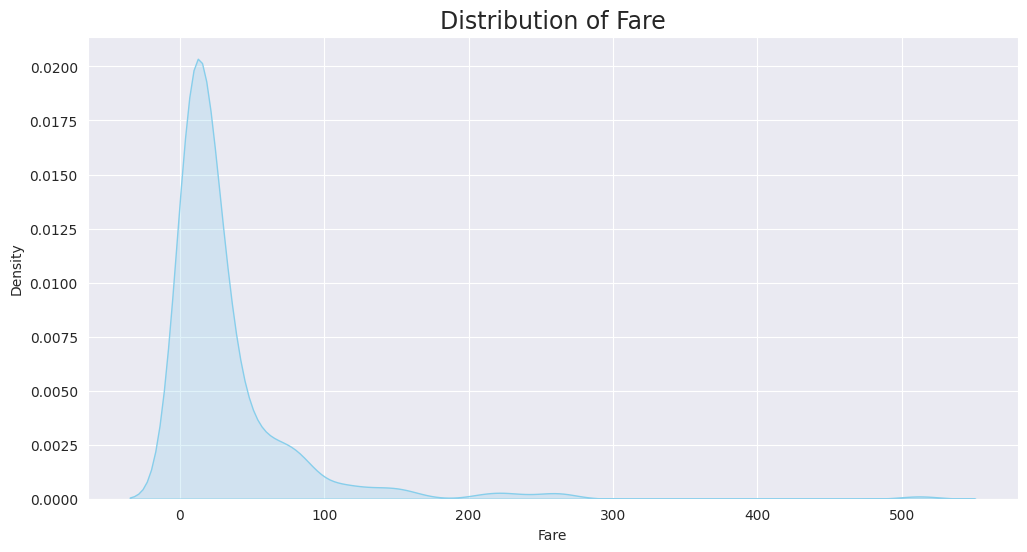

In [151]:
for i in df.select_dtypes(include='number').columns:
    if i not in ['PassengerId' , 'Survived' , 'Pclass']:
        print(i,df[i].nunique())
        plt.figure(figsize=(12,6))
        plt.title(f'Distribution of {i}',fontsize=17)
        sns.kdeplot(df[i],palette='skyblue', fill=True, color='skyblue')
     
        plt.show()

Right-Skewed Distribution: Mean > Median > Mode: The mean tends to be greater than the median due to the influence of higher age values.
Long right tail: The tail of the distribution stretches out to the right, indicating that price of the most of sold houses are small prices.

as it show in the graph that Skewed Distribution is present so the good way to handle Missing Values in price Column is Median

# Data Cleaning :

Handle missing values :

In [152]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            169
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

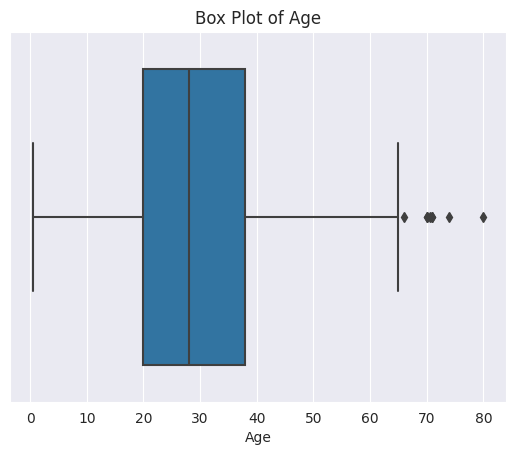

In [153]:
sns.boxplot(x=df['Age'])

plt.title('Box Plot of Age')

plt.show()

In [154]:
median  = df.Age.median()
median

28.0

In [155]:
df['Age'].fillna(median , inplace = True)

In [156]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [157]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Bivarient : 

<Axes: ylabel='count'>

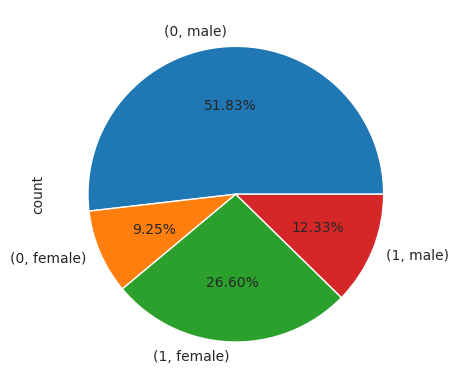

In [158]:
data_sur_sex=df.groupby('Survived')['Sex'].value_counts().plot.pie(autopct='%.2f%%')
data_sur_sex

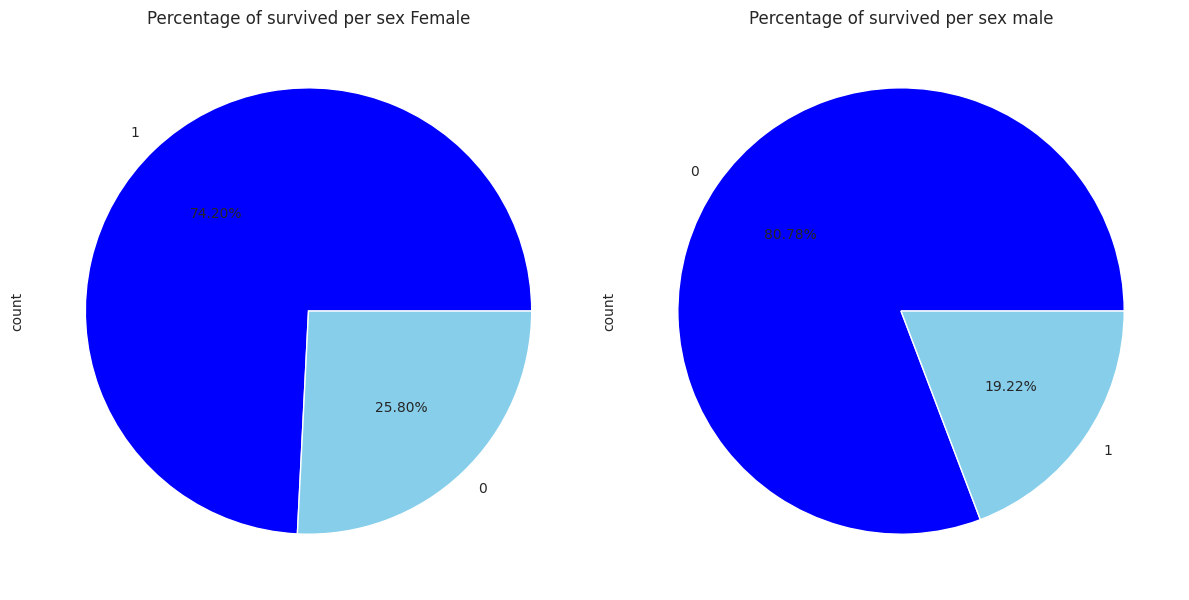

In [159]:
data_sur_sex=df.groupby('Sex')['Survived'].value_counts()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title(f'Percentage of survived per sex Female')
data_sur_sex.xs('female', level='Sex').plot.pie(autopct='%.2f%%',colors=['blue','skyblue'])
plt.subplot(1,2,2)
plt.title(f'Percentage of survived per sex male')
data_sur_sex.xs('male', level='Sex').plot.pie(autopct='%.2f%%',colors=['blue','skyblue'])
plt.tight_layout()
plt.show()

In [160]:
data_pc_sur=df.groupby('Pclass')['Survived'].value_counts()
data_pc_sur

Pclass  Survived
1       1           136
        0            75
2       0            91
        1            87
3       0           369
        1           118
Name: count, dtype: int64

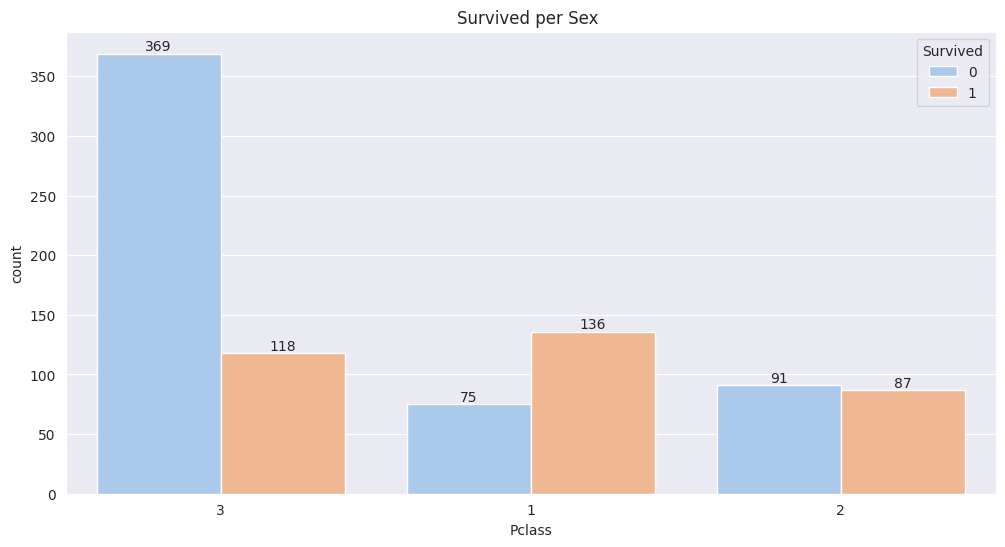

In [161]:
plt.figure(figsize=(12,6))

plt.title(f'Survived per Sex ')
ax=sns.countplot(data=df,x='Pclass',hue='Survived',palette='pastel',order=df.Pclass.value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()


<Axes: xlabel='Survived', ylabel='Fare'>

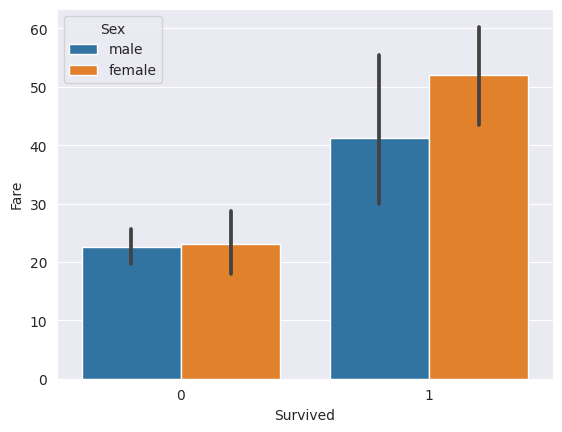

In [162]:
sns.barplot(data=df,x='Survived',y='Fare',hue='Sex')

# Apply Log Transform to Skewed Featuers :

In [163]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [164]:
skewed_featuers = ['SibSp' , 'Parch' ,'Fare']
df[skewed_featuers] = np.log1p(df[skewed_featuers])

In [165]:
df[skewed_featuers].head()

,SibSp,Parch,Fare
0,0.693147,0.0,2.110213
1,0.693147,0.0,4.280593
2,0.000000,0.0,2.188856
3,0.693147,0.0,3.990834
4,0.000000,0.0,2.202765


Age 88


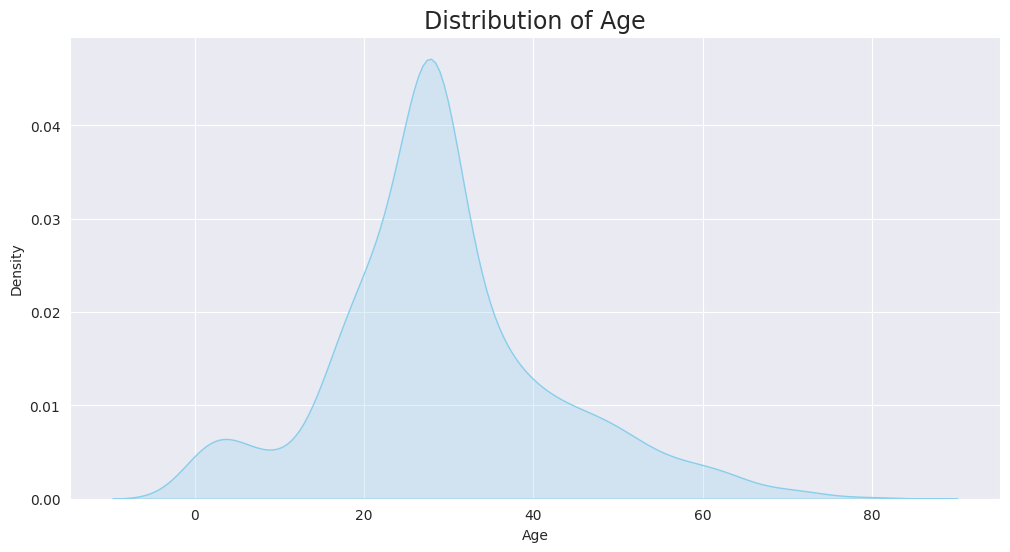

SibSp 7


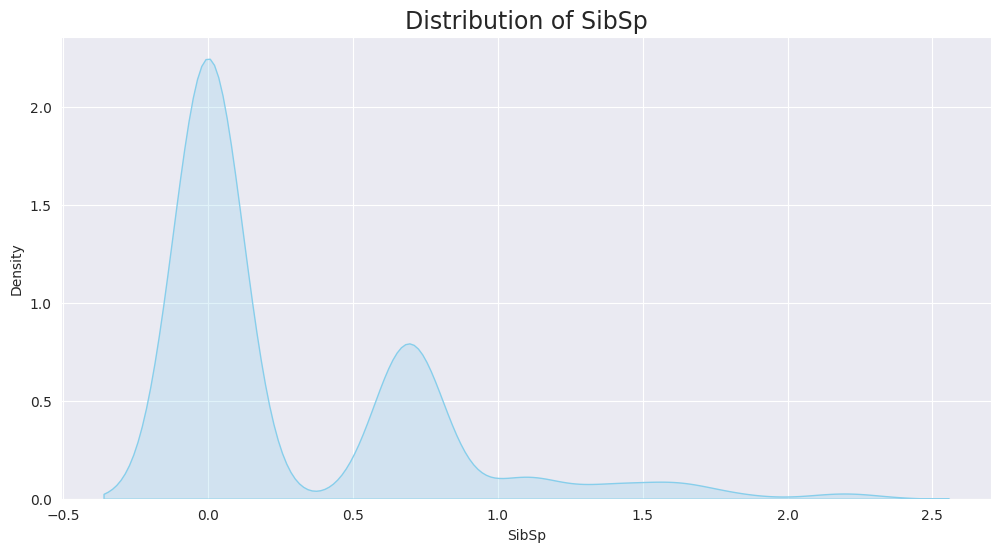

Parch 7


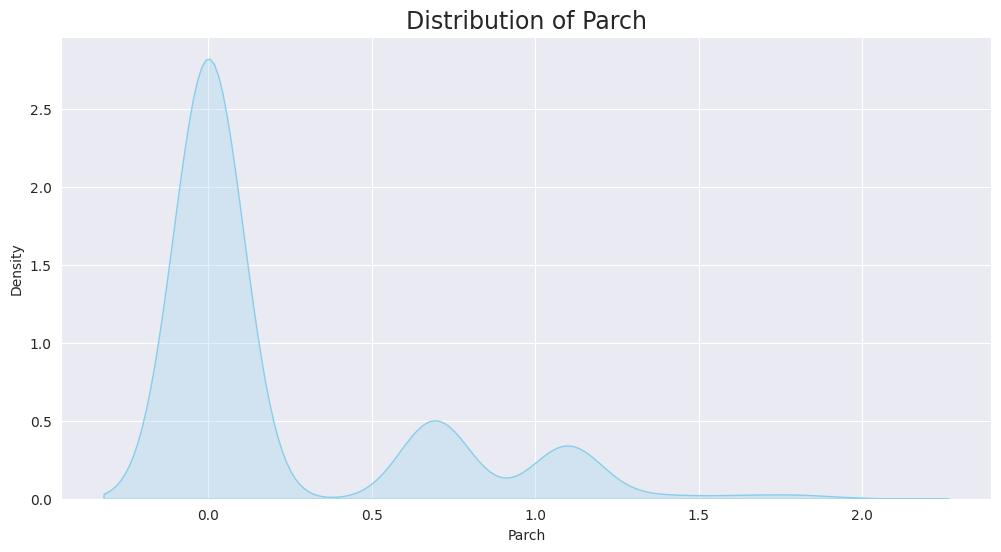

Fare 247


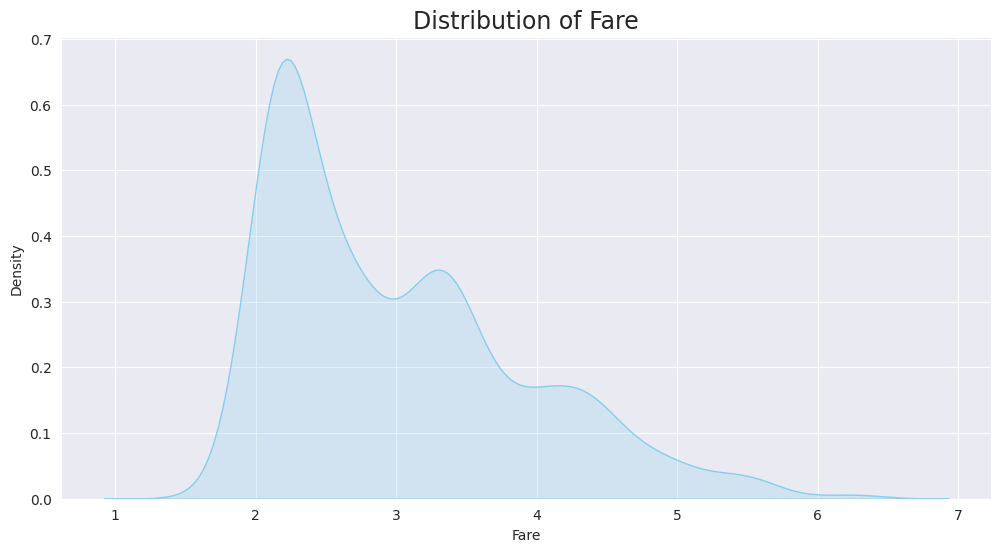

In [166]:
for i in df.select_dtypes(include='number').columns:
    if i not in ['PassengerId' , 'Survived' , 'Pclass']:
        print(i,df[i].nunique())
        plt.figure(figsize=(12,6))
        plt.title(f'Distribution of {i}',fontsize=17)
        sns.kdeplot(df[i],palette='skyblue', fill=True, color='skyblue')
     
        plt.show()

# Featuer Selection :

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0.693147,0.0,A/5 21171,2.110213,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0.693147,0.0,PC 17599,4.280593,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.000000,0.0,STON/O2. 3101282,2.188856,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0.693147,0.0,113803,3.990834,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.000000,0.0,373450,2.202765,S


drop PassengerId , Name and Ticket  Featuers :

In [168]:
col_to_drop = ['PassengerId' , 'Name' , 'Ticket']
df.drop(col_to_drop , axis = 1 , inplace = True)

In [169]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,0.693147,0.0,2.110213,S
1,1,1,female,38.0,0.693147,0.0,4.280593,C
2,1,3,female,26.0,0.000000,0.0,2.188856,S
3,1,1,female,35.0,0.693147,0.0,3.990834,S
4,0,3,male,35.0,0.000000,0.0,2.202765,S


# Encoding Categorical Featuers :

In [170]:
df.Sex.value_counts()

Sex
male      562
female    314
Name: count, dtype: int64

In [171]:
df.Embarked.value_counts()

Embarked
S    631
C    168
Q     77
Name: count, dtype: int64

In [172]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [173]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True ,dtype=int)

In [174]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,0.693147,0.0,2.110213,0,1
1,1,1,1,38.0,0.693147,0.0,4.280593,0,0
2,1,3,1,26.0,0.000000,0.0,2.188856,0,1
3,1,1,1,35.0,0.693147,0.0,3.990834,0,1
4,0,3,0,35.0,0.000000,0.0,2.202765,0,1


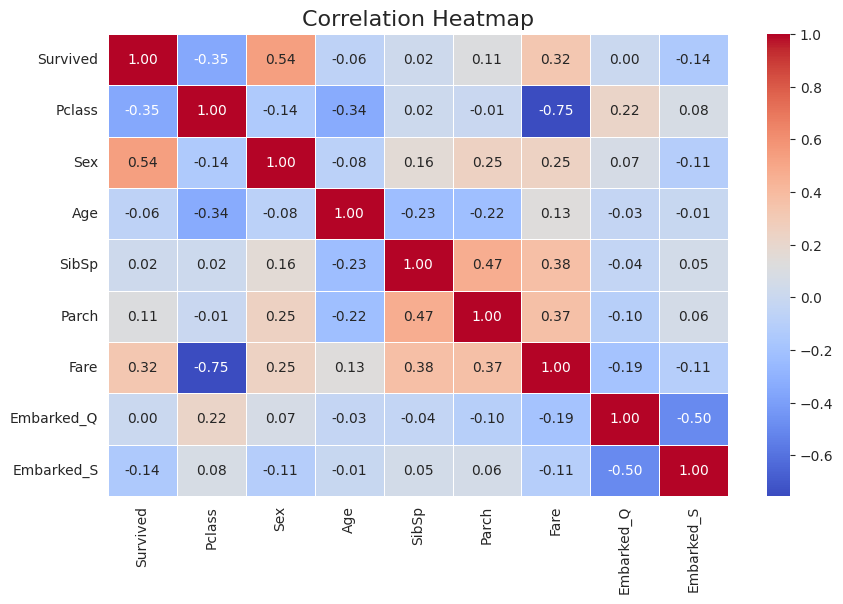

In [175]:
corr = df.corr()   
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Modeling :

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [179]:
def run_models(df, target_col="Survived"):
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    num_cols = X.select_dtypes(include=["int64", "float64"]).columns

    scaler = RobustScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

    selector = SelectFromModel(RandomForestClassifier(random_state=42), threshold="median")
    selector.fit(X_train_scaled, y_train)
    X_train_selected = selector.transform(X_train_scaled)
    X_test_selected = selector.transform(X_test_scaled)

    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
        "SVC": SVC(kernel="linear", probability=True, random_state=42),
        "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
    }

    results = {"No Scaling": {}, "With Scaling": {}, "After Feature Selection": {}}

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        results["No Scaling"][name] = accuracy_score(y_test, preds)

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        results["With Scaling"][name] = accuracy_score(y_test, preds)

    for name, model in models.items():
        model.fit(X_train_selected, y_train)
        preds = model.predict(X_test_selected)
        results["After Feature Selection"][name] = accuracy_score(y_test, preds)

    return pd.DataFrame(results)

results = run_models(df) 
print(results)

                    No Scaling  With Scaling  After Feature Selection
LogisticRegression    0.767045      0.767045                 0.767045
SVC                   0.806818      0.806818                 0.806818
RandomForest          0.755682      0.755682                 0.789773
XGBoost               0.732955      0.732955                 0.761364


# 📊 Model Performance Comparison

Four different models were trained on the Titanic dataset (`Survived`) and evaluated under three scenarios:

1. **Without Scaling** (raw features)  
2. **With RobustScaler applied** on numerical features  
3. **After Feature Selection** (training only on the most important features)  

---

## 🔹 Accuracy Scores

| Model               | No Scaling | With Scaling | After Feature Selection |
|---------------------|------------|--------------|--------------------------|
| Logistic Regression | 0.7670     | 0.7670       | 0.7670                   |
| SVC                 | 0.8068     | 0.8068       | 0.8068                   |
| Random Forest       | 0.7557     | 0.7557       | 0.7898                   |
| XGBoost             | 0.7330     | 0.7330       | 0.7614                   |

---

## 🔹 Insights

- **Logistic Regression**:  
  Performance remained constant (0.767) across all scenarios. This is expected since logistic regression is a linear model and scaling/feature selection had minimal impact here.  

- **SVC (Support Vector Classifier)**:  
  Achieved the **highest accuracy (0.807)** and was not affected by scaling or feature selection, showing robustness in this dataset.  

- **Random Forest**:  
  Improved significantly after **Feature Selection** (from 0.756 → 0.790). This highlights the benefit of removing irrelevant features for tree-based models.  

- **XGBoost**:  
  Started weaker (0.733) but improved with **Feature Selection** to 0.761, confirming that boosting models also benefit from focusing on the most relevant features.  

---

## 🔹 Conclusion
- **SVC** delivered the best overall performance (0.807).  
- **Feature Selection** had the largest positive effect on **tree-based models** (Random Forest and XGBoost).  
- **Scaling (RobustScaler)** had little impact in this case, which makes sense since the main features are not heavily scale-dependent (unlike in models such as KNN or Neural Networks).  
